# Detecting Anomalies in Network Traffic Data

* In this lesson, we will explore how to detect anomalies in network traffic data using the One-Class Support Vector Machine (SVM) algorithm. Anomalies in network traffic can indicate potential security threats, such as cyber-attacks or data breaches. By the end of this tutorial, you will understand how to preprocess data, train an anomaly detection model, and evaluate its performance.


* Imagine you are working for a cybersecurity firm that monitors network traffic to detect unusual activities that could indicate a potential security breach. You are tasked with developing a system that can learn the normal behavior of network traffic and then identify any deviations from this behavior. This is known as anomaly detection. One effective way to accomplish this is by using the One-Class Support Vector Machine (One-Class SVM) algorithm, which is designed for such tasks.

> In this lesson, we will use a dataset representing network traffic to train a One-Class SVM model. We will then use this model to detect anomalies, which could signify potential security threats.



> ONE CLASS SVM

One-Class SVM (Support Vector Machine) is a machine learning algorithm used for anomaly detection. Unlike traditional SVMs that are designed for binary classification (classifying data into two classes), One-Class SVM is designed for the specific task of identifying anomalies in a dataset when you have only one class of examples (normal instances) during training.

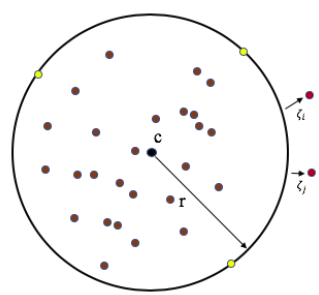


**Step 1: Importing Necessary Libraries**
> In this section, we import the required libraries for data manipulation, visualization, and building the One-Class SVM model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

**Step 2: Generating Synthetic Data** <br>
*This code creates a simple dataset with a majority of normally distributed data points and a few outlier points (anomalies) scattered around. This is a common setup for testing anomaly detection algorithms.



In [2]:
# Generate some example data (2D data for simplicity)
# It sets a random seed for reproducibility using
np.random.seed(42)
# It creates a set of "normal" data points using
normal_data = np.random.randn(1000, 2)  # Normal data #which generates 1000 data points in 2 dimensions (think of it as points on a graph) following a standard normal distribution.
anomaly_data = np.random.uniform(low=-8, high=8, size=(200, 2))  # Anomaly data # which generates 200 data points with values uniformly distributed between -8 and 8 in 2 dimensions.

# Concatenate normal and anomaly  (Combines the data)
data = np.vstack([normal_data, anomaly_data])

print(data)




[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 ...
 [-3.2550414   3.43078663]
 [ 4.14408452 -6.35974457]
 [ 0.22167143  0.14224889]]


**Step 3, 4 : Fitting the Model** & **Predicting Anomalies**




In [3]:

# Fit a One-Class SVM model
# Initializes a One-Class SVM model from the sklearn.svm module.
# nu=0.05 sets an upper bound on the fraction of training errors and a lower bound on the fraction of support vectors.
# >>> It controls the trade-off between model complexity and the number of outliers it allows.
# kernel="rbf" specifies the use of a radial basis function kernel, which is commonly used for non-linear data.
# gamma=0.1 controls the influence of individual training samples on the decision boundary.
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
clf.fit(normal_data) # Trains the One-Class SVM model using only the normal_data. This is important because One-Class SVM learns the boundaries of the normal data distribution to identify anomalies.

# Predict outliers/anomalies
# Uses the trained model to predict whether each data point in the combined data array is an outlier (anomaly) or not.
# The predict method returns an array pred where:
# 1 indicates a normal data point (inlier).
# -1 indicates an anomaly (outlier).
pred = clf.predict(data)



**Step 5: Visualizing the Results**

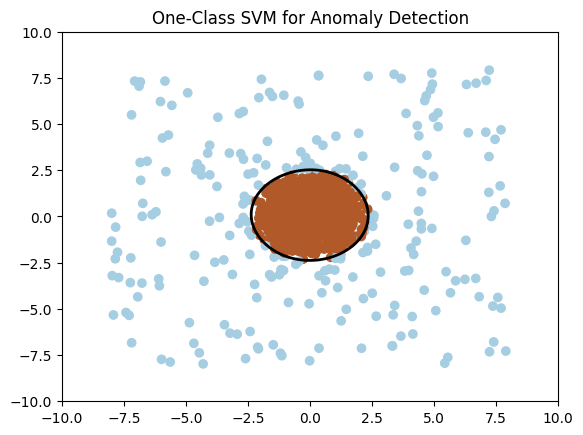

In [4]:
# Plot the data points and decision boundary
xx, yy = np.meshgrid(np.linspace(-10, 10, 500), np.linspace(-10, 10, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')  # Decision boundary
plt.scatter(data[:, 0], data[:, 1], c=pred, cmap=plt.cm.Paired)  # Scatter plot

plt.title("One-Class SVM for Anomaly Detection")
plt.show()

# **Interactive Parameter Tuning (Sliders with ipywidgets)**

*How the nu and gamma parameters affect the decision boundary and model sensitivity.*

In [5]:
import ipywidgets as widgets
from IPython.display import display

def update_plot(nu_val, gamma_val):
    clf = svm.OneClassSVM(nu=nu_val, kernel="rbf", gamma=gamma_val)
    clf.fit(normal_data)
    pred = clf.predict(data)
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    plt.scatter(data[:, 0], data[:, 1], c=pred, cmap=plt.cm.Paired)
    plt.title(f"One-Class SVM with nu={nu_val}, gamma={gamma_val}")
    plt.show()

widgets.interact(update_plot,
                 nu_val=widgets.FloatSlider(min=0.01, max=0.2, step=0.01, value=0.05),
                 gamma_val=widgets.FloatLogSlider(base=10, min=-2, max=1, step=0.1, value=0.1))


interactive(children=(FloatSlider(value=0.05, description='nu_val', max=0.2, min=0.01, step=0.01), FloatLogSli…

<function __main__.update_plot(nu_val, gamma_val)>

# **Add Your Own Anomaly**
Manually insert Your own data point and see if the model flags it.

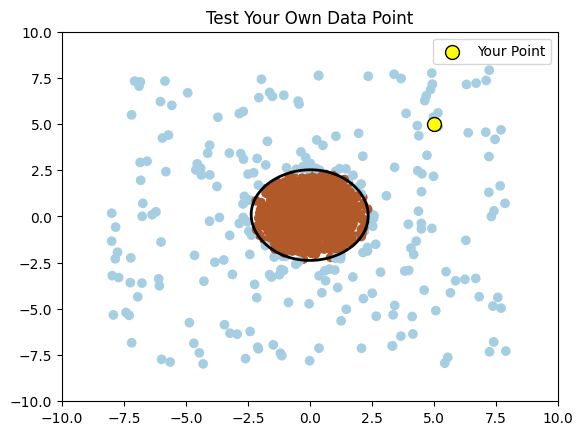

In [6]:
# Add a new point manually
new_point = np.array([[5, 5]])
combined_data = np.vstack([data, new_point])
combined_pred = clf.predict(combined_data)

# Plot with the new point
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(data[:, 0], data[:, 1], c=pred, cmap=plt.cm.Paired)
plt.scatter(new_point[:, 0], new_point[:, 1], c='yellow', edgecolors='black', s=100, label='Your Point')
plt.title("Test Your Own Data Point")
plt.legend()
plt.show()


# **Interactive**

Enter the X coordinate of your point (e.g., 3.5): 0
Enter the Y coordinate of your point (e.g., -2.1): 2


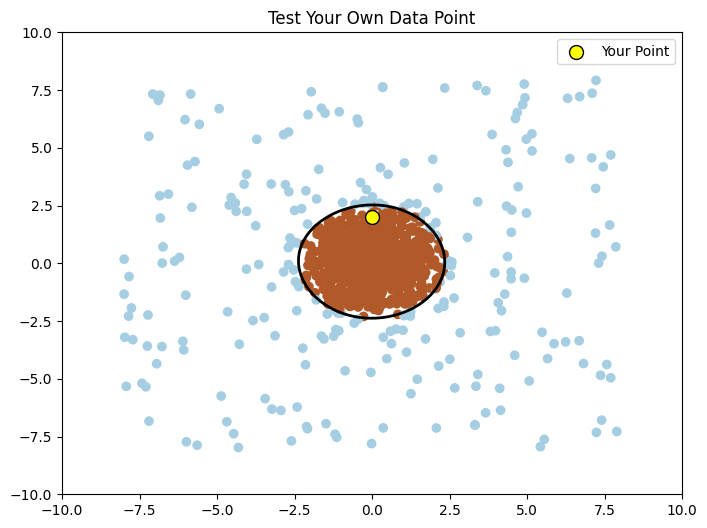

✅ The model classified your point as NORMAL.


In [7]:
# Prompt user to input a new data point
try:
    x_input = float(input("Enter the X coordinate of your point (e.g., 3.5): "))
    y_input = float(input("Enter the Y coordinate of your point (e.g., -2.1): "))
    new_point = np.array([[x_input, y_input]])

    # Add the new point to the existing dataset
    combined_data = np.vstack([data, new_point])
    combined_pred = clf.predict(combined_data)

    # Plot decision boundary and data with the new point
    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')  # Decision boundary
    plt.scatter(data[:, 0], data[:, 1], c=pred, cmap=plt.cm.Paired)   # Existing data
    plt.scatter(new_point[:, 0], new_point[:, 1],
                c='yellow', edgecolors='black', s=100, label='Your Point')  # New point
    plt.title("Test Your Own Data Point")
    plt.legend()
    plt.show()

    # Feedback
    if combined_pred[-1] == 1:
        print("✅ The model classified your point as NORMAL.")
    else:
        print("⚠️ The model flagged your point as ANOMALOUS.")

except ValueError:
    print("❌ Invalid input. Please enter numerical values only.")
